In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, noise=0.13, random_state=42)

df = pd.DataFrame(dict(x1=X[:, 0], x2=X[:, 1], y=y))

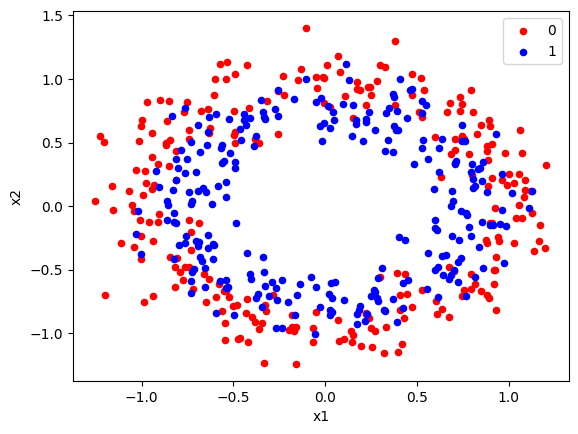

In [2]:
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color = colors[key])
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate the dataset
X, y = make_circles(n_samples=100, factor=0.3, noise=0.1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM model with RBF kernel
svm = SVC(kernel='rbf', gamma='auto')

# Fit the model
svm.fit(X_train, y_train)

# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    # Create a grid of points
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

# Visualize the decision boundary on the training data
plot_decision_boundary(X_train, y_train, svm)

# Print the accuracy on the test set
accuracy = svm.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


In [3]:
class SVM:

    def __init__(self, C = 1.0, kernel=None):
        # C = error term
        self.C = C
        self.w = 0
        self.b = 0

    def transform_poly(self, X, Y=None):
        X['x1^2'] = X['x1'] ** 2
        X['x2^2'] = X['x2'] ** 2

        X['x1 * x2'] = X['x1'] * X['x2']

        X = X.to_numpy()

        if Y.size != 0:
            Y = Y.to_numpy()
            return X, Y
        else:
            return X

    # Hinge Loss Function / Calculation
    def hingeloss(self, w, b, x, y):
        # Regularizer term
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Optimization term
            opt_term = y[i] * ((np.dot(w, x[i])) + b)

            # calculating loss
            loss = reg + self.C * max(0, 1-opt_term)
        return loss[0][0]

    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):

        if(self.kernel == "poly"):
            print("SVM(kernel='poly')")
            X, Y = self.transform_poly(X, Y)
        else:
            X = X.to_numpy()
            Y = Y.to_numpy()

        # The number of features in X
        number_of_features = X.shape[1]

        # The number of Samples in X
        number_of_samples = X.shape[0]

        c = self.C

        # Creating ids from 0 to number_of_samples - 1
        ids = np.arange(number_of_samples)

        # Shuffling the samples randomly
        np.random.shuffle(ids)

        # creating an array of zeros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Gradient Descent logic
        for i in range(epochs):
            # Calculating the Hinge Loss
            l = self.hingeloss(w, b, X, Y)

            # Appending all losses 
            losses.append(l)
            
            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculating the gradients

                            #w.r.t w 
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Updating weights and bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb
        
        self.w = w
        self.b = b

        return self.w, self.b, losses

    def predict(self, X):
        if(self.kernel == "poly"):
            X = self.transform_poly(X, np.array([]))
        else:
            X.to_numpy()
        
        prediction = np.dot(X, self.w[0]) + self.b # w.x + b
        return np.sign(prediction)

In [4]:
# creating X and y values
X = df[['x1', 'x2']]
y = df['y']

# Replacing 0 with -1 for the SVM model to recognize labels
y = y.replace(0, -1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [5]:
# Self Coded SVM algorithm
from sklearn.metrics import accuracy_score

svm = SVM()

w, b, losses = svm.fit(X_train, y_train)

pred = svm.predict(X_test)

accuracy_score("Accuracy:",pred, y_test)

KeyError: 0